# Load Packages

In [1]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [14]:
# Load additional scikit learn packages! if you need
import sklearn.naive_bayes
import sklearn.neighbors
import sklearn.neural_network
import sklearn
import sklearn.svm
import sklearn.utils
import sklearn.semi_supervised

# Load Data Points (Do not modify the following block)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

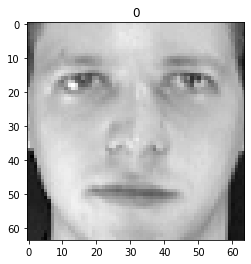

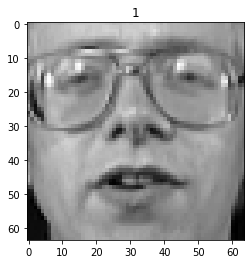

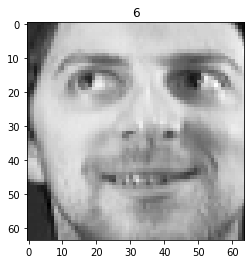

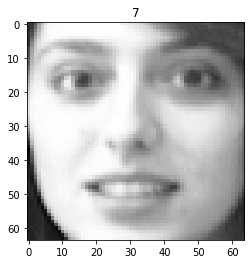

In [3]:
olivetti_faces = sklearn.datasets.fetch_olivetti_faces(random_state=0,)
print(olivetti_faces['DESCR'])

example_indices = [0, 10, 62, 70]
for idx in example_indices:
    plt.title(olivetti_faces['target'][idx])
    plt.imshow(olivetti_faces['images'][idx])
    plt.gray()
    plt.show()
    
X = olivetti_faces['data']
y = olivetti_faces['target']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'olivetti_faces' is a variable containing a set of face images
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

In [ ]:
y_train

array([ 9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10, 31,
       19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28, 11,
       21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6, 16,
       28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2, 18,
       36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27, 27,
       30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38, 34,
        4,  1, 28,  7, 24, 39,  7,  1, 36, 21, 38, 38, 22, 16, 10, 16,  8,
       18, 39, 11, 25, 18, 20, 37, 11, 14, 15, 15,  1, 26,  7, 10, 32, 20,
       31, 13, 23, 31, 24, 30,  1, 22, 30,  0, 27, 12,  7, 18, 30, 37, 34,
       18, 35,  8, 25,  1, 29,  8, 26,  3, 38,  5,  4, 27,  5, 20, 31, 31,
       33, 12, 22,  6, 30, 13, 18,  2,  4,  0, 20, 33,  9, 38, 17, 25,  9,
       36,  9, 35, 16,  6, 30,  4, 20, 27, 22, 14, 14, 18, 13, 35, 39, 26,
       32, 20,  8, 12, 34, 36,  9,  8, 26, 11, 29,  5, 32, 25, 35,  4, 10,
       36, 27, 35,  3,  5

In [20]:
clf_log = sklearn.linear_model.LogisticRegression(tol= .00001, max_iter= 1000, random_state= 0)
clf_log.fit(X_train, y_train)
clf_log_pred = clf_log.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_log_pred))

0.9500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
clf_MLP = sklearn.neural_network.MLPClassifier(activation= "logistic", max_iter= 10000, tol= .00001,warm_start= True ,learning_rate= "adaptive", n_iter_no_change= 100, random_state= 0)
clf_MLP.fit(X_train, y_train)
clf_MLP_pred = clf_MLP.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_MLP_pred))

0.9500


In [ ]:
clf_rf = sklearn.ensemble.RandomForestClassifier(warm_start= True,random_state= 0)
clf_rf.fit(X_train, y_train)
clf_rf_pred = clf_rf.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_rf_pred))

0.8750


In [29]:
clf_gb = sklearn.linear_model.PassiveAggressiveClassifier()
clf_gb.fit(X_train, y_train)
clf_gb_pred = clf_gb.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_gb_pred))

0.6667


In [35]:
clf_dt = sklearn.svm.NuSVC(kernel = "linear", tol = .00001, random_state= 0)
clf_dt.fit(X_train, y_train)
clf_dt_pred = clf_dt.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_dt_pred))

0.9250


In [24]:
clf_xgb = sklearn.ensemble.ExtraTreesClassifier(max_depth= 40, criterion= "gini", n_estimators= 300, random_state= 0)
clf_xgb.fit(X_train, y_train)
clf_xgb_pred = clf_xgb.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_xgb_pred))

0.9083


In [17]:
clf_ada = sklearn.semi_supervised.SelfTrainingClassifier(clf_svm)
clf_ada.fit(X_train, y_train)
clf_ada_pred = clf_ada.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_ada_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_self_training.py:210: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


0.9750


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
clf_bgg = sklearn.ensemble.BaggingClassifier(sklearn.tree.DecisionTreeClassifier(),n_estimators=10, random_state= 0)
clf_bgg.fit(X_train, y_train)
clf_bgg_pred = clf_bgg.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_bgg_pred))

0.5750


In [ ]:
clf_sgd = sklearn.linear_model.SGDClassifier(loss= "perceptron",penalty= "l1" ,warm_start= True ,max_iter= 5000, tol= .00001, random_state= 0)
clf_sgd.fit(X_train, y_train)
clf_sgd_pred = clf_sgd.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_sgd_pred))

0.8500


In [16]:
clf_svm = sklearn.svm.LinearSVC(C= .1, tol= .00001 ,random_state= 0)
clf_svm.fit(X_train, y_train)
clf_svm_pred = clf_svm.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_svm_pred))

0.9750


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [25]:
clf_rid = sklearn.linear_model.RidgeClassifier(alpha= .5, tol= .00001 ,random_state= 0)
clf_rid.fit(X_train, y_train)
clf_rid_pred = clf_rid.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_rid_pred))

0.9333


In [22]:
clf_svc = sklearn.svm.SVC(kernel = "poly", degree= 3,C= .1, probability= True, tol= .00001 ,random_state= 0)
clf_svc.fit(X_train, y_train)
clf_svc_pred = clf_svc.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_svc_pred))

0.9667


In [27]:
clf_softvoting = sklearn.ensemble.VotingClassifier(estimators= [("svc", clf_svc), ("log", clf_log), ("mlp", clf_mlp), ])

clf_softvoting.fit(X_train, y_train)
clf_softvoting_pred = clf_softvoting.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_softvoting_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9500


In [39]:
clf_svc = sklearn.svm.SVC(kernel = "poly", degree= 3,C= .1, probability= True, tol= .00001 ,random_state= 0)#96.6666
clf_svm = sklearn.svm.LinearSVC(C= .1, tol= .00001 ,random_state= 0)#97.5
clf_ssl = sklearn.semi_supervised.SelfTrainingClassifier(clf_svm)#97.5
clf_nus = sklearn.svm.NuSVC(kernel = "linear", tol = .00001, random_state= 0)#92.5
clf_log = sklearn.linear_model.LogisticRegression(tol= .00001, max_iter= 1000, random_state= 0)#95
clf_mlp = sklearn.neural_network.MLPClassifier(activation= "logistic", max_iter= 10000, tol= .00001,warm_start= True ,learning_rate= "adaptive", n_iter_no_change= 100, random_state= 0) #95
clf_rid = sklearn.linear_model.RidgeClassifier(alpha= .5, tol= .00001 ,random_state= 0)#93.3333
clf_softvoting = sklearn.ensemble.VotingClassifier(estimators= [("svc", clf_svc), ("log", clf_log), ("mlp", clf_mlp)], voting = "soft")

clf_hardvoting = sklearn.ensemble.VotingClassifier(estimators=[("softvoting", clf_softvoting), ("svm", clf_svm), ("ssl", clf_ssl), ("rid", clf_rid), ("svc", clf_svc), ("log", clf_log), ("mlp", clf_mlp), ("nus", clf_nus)], voting = "hard")
clf_hardvoting.fit(X_train, y_train)
clf_hardvoting_pred = clf_hardvoting.predict(X_test)

print("%.4f" % sklearn.metrics.accuracy_score(y_test, clf_hardvoting_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_self_training.py:210: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to

0.9917


In [40]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"



clf_svc = sklearn.svm.SVC(kernel = "poly", degree= 3,C= .1, probability= True, tol= .00001 ,random_state= 0)#96.6666
clf_svm = sklearn.svm.LinearSVC(C= .1, tol= .00001 ,random_state= 0)#97.5
clf_ssl = sklearn.semi_supervised.SelfTrainingClassifier(clf_svm)#97.5
clf_nus = sklearn.svm.NuSVC(kernel = "linear", tol = .00001, random_state= 0)#92.5
clf_log = sklearn.linear_model.LogisticRegression(tol= .00001, max_iter= 1000, random_state= 0)#95
clf_mlp = sklearn.neural_network.MLPClassifier(activation= "logistic", max_iter= 10000, tol= .00001,warm_start= True ,learning_rate= "adaptive", n_iter_no_change= 100, random_state= 0) #95
clf_rid = sklearn.linear_model.RidgeClassifier(alpha= .5, tol= .00001 ,random_state= 0)#93.3333
clf_softvoting = sklearn.ensemble.VotingClassifier(estimators= [("svc", clf_svc), ("log", clf_log), ("mlp", clf_mlp)], voting = "soft")

clf_hardvoting = sklearn.ensemble.VotingClassifier(estimators=[("softvoting", clf_softvoting), ("svm", clf_svm), ("ssl", clf_ssl), ("rid", clf_rid), ("svc", clf_svc), ("log", clf_log), ("mlp", clf_mlp), ("nus", clf_nus)], voting = "hard")
clf_hardvoting.fit(X_train, y_train)


y_pred = np.zeros_like(y_test)
y_pred = clf_hardvoting.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_self_training.py:210: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to

### Print accuracy (do not modify the following block)

In [41]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99
